In [34]:
%pip install -Uq seaborn
%pip install -Uq rich
%pip install -Uq plotly
%pip install -Uq scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: C:\Users\Евгений\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: C:\Users\Евгений\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: C:\Users\Евгений\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: C:\Users\Евгений\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [35]:
import math
from rich import print
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats as st


In [36]:
rides = pd.read_csv('rides_go.csv')
subscriptions = pd.read_csv('subscriptions_go.csv')
users = pd.read_csv('users_go.csv')

rides['date'] = pd.to_datetime(rides['date'])
rides.head()



,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [37]:
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [38]:
subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [39]:
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


<Axes: ylabel='count'>

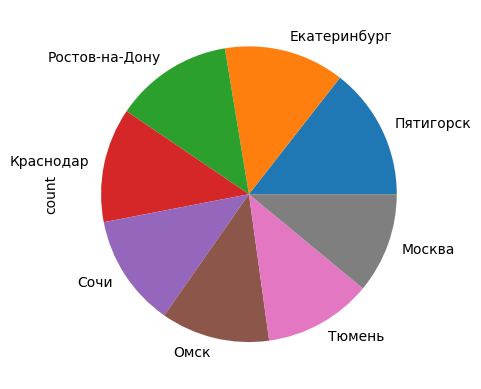

In [40]:
users.city.value_counts().plot.pie()

In [41]:
data = users.merge(rides, on='user_id')
data['date_month'] = data['date'].dt.month
data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,date_month
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8


In [42]:

data_free = data.query('subscription_type == "free"')
data_ultra = data.query('subscription_type == "ultra"')
display(data_free.head())
data_ultra.head()

,user_id,name,age,city,subscription_type,distance,duration,date,date_month
6672,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1
6673,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2
6674,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2
6675,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2
6676,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2


,user_id,name,age,city,subscription_type,distance,duration,date,date_month
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8


In [43]:
data_cd = data
data_cd.duration = data_cd.duration.apply(np.ceil)

In [44]:
users_pivot = pd.pivot_table(
    data_cd, 
    index=['user_id', 'date_month'],
    #columns=['subscription_type'],
    values=['distance', 'duration'], 
    aggfunc={
        'distance': 'sum',
        'user_id': 'count',
        'duration': 'sum',
    }
)
users_pivot.columns = ['month_distance', 'month_duration', 'month_rides']
users_pivot['subscription_type'] = \
    users_pivot.apply(lambda x: users[users.user_id == x.name[0]].iloc[0][-1], axis=1)
users_pivot.head(10)

C:\Users\Евгений\AppData\Local\Temp\ipykernel_6180\1432431375.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  users_pivot.apply(lambda x: users[users.user_id == x.name[0]].iloc[0][-1], axis=1)


month_distance  month_duration  month_rides  \
user_id date_month                                                
1       1              7027.511294            42.0            2   
        4               754.159807             7.0            1   
        8              6723.470560            46.0            2   
        10             5809.911100            32.0            2   
        11             7003.499363            56.0            3   
        12             6751.629942            28.0            2   
2       3             10187.723006            63.0            3   
        4              6164.381824            40.0            2   
        6              3255.338202            14.0            1   
        7              6780.722964            48.0            2   

                   subscription_type  
user_id date_month                    
1       1                      ultra  
        4                      ultra  
        8                      ultra  
        10                     ultra  
        11                     ultra  
        12                     ultra  
2       3                      ultra  
        4                      ultra  
        6                      ultra  
        7                      ultra

In [45]:
def calculate_month_cost(row):
    if row['subscription_type'] == 'ultra':
        return 199 + (6 * row['month_duration'])
    else:
        return 50 * row['month_rides'] + (8 * row['month_duration'])

users_pivot['month_cost'] = users_pivot.apply(calculate_month_cost, axis=1)
users_pivot.head(10)

month_distance  month_duration  month_rides  \
user_id date_month                                                
1       1              7027.511294            42.0            2   
        4               754.159807             7.0            1   
        8              6723.470560            46.0            2   
        10             5809.911100            32.0            2   
        11             7003.499363            56.0            3   
        12             6751.629942            28.0            2   
2       3             10187.723006            63.0            3   
        4              6164.381824            40.0            2   
        6              3255.338202            14.0            1   
        7              6780.722964            48.0            2   

                   subscription_type  month_cost  
user_id date_month                                
1       1                      ultra       451.0  
        4                      ultra       241.0  
        8                      ultra       475.0  
        10                     ultra       391.0  
        11                     ultra       535.0  
        12                     ultra       367.0  
2       3                      ultra       577.0  
        4                      ultra       439.0  
        6                      ultra       283.0  
        7                      ultra       487.0

Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

$H0$ - помесячная пописка от пользоватлей ultra = помесячная пописке от пользоватлей free \
$H1$ - помесячная пописка от пользоватлей ultra > помесячная пописке от пользоватлей free

In [46]:
alpha = 0.05
ultra_month_cost = users_pivot[users_pivot['subscription_type'] == 'ultra']['month_cost']
free_month_cost = users_pivot[users_pivot['subscription_type'] == 'free']['month_cost']

result = st.ttest_ind(ultra_month_cost, 
                      free_month_cost, 
                      alternative = 'greater'
)

print(f'p-value: {result.pvalue}')

if result.pvalue < alpha:
    print('Нулевая гипотеза отвергнута')
else:
    print('Нулевая гипотеза не отвергнута')

p-value: 4.227438894541133e-29

Нулевая гипотеза отвергнута

Среднее количество поездок в месяц пользователей с подпиской больше, чем у пользователей без подписки?

$H0$ - среднее количество поездок в месяц у пользоватей с подпиской = количеству поездок в месяц пользователей без подписки \
$H1$ - среднее количесво поездок в месяц у пользователей с подпиской привышает количество поездок в месяц пользователей без подписки

In [47]:
alpha = 0.05

subcribe_ultra = users_pivot[users_pivot['subscription_type'] == 'ultra']['month_rides']
subcribe_free = users_pivot[users_pivot['subscription_type'] == 'free']['month_rides']

result = st.ttest_ind(ultra_month_cost, 
                      free_month_cost, 
                      alternative = 'greater'
)

print(f'p-value: {result.pvalue}')

if result.pvalue < alpha:
    print('Нулевая гипотеза отвергнута')
    
else:
    print('Нулевая гипотеза не отвергнута')

p-value: 4.227438894541133e-29

Нулевая гипотеза отвергнута

Средняя дистанция поездки "холодные" месяца (с октября по март) отличается от "тёплых"?\
$H0$: дистанция поездок в холодные месеца равны дистанции поездок в тёплые месеца \
$H1$: дистанция поездок в холодные месеца меньше чем дистанция в тёплые 

In [48]:
alpha = 0.05

cold = [10, 11, 12, 1, 2 ,3]
warm = [4, 5, 6, 7, 8, 9]

middle_cold = users_pivot.query('date_month in @cold')['month_distance']
middle_warm = users_pivot.query('date_month in @warm')['month_distance']



results = st.ttest_ind(
    middle_cold,
    middle_warm,
    alternative='two-sided'
)
print(middle_cold.mean())
print(middle_warm.mean())
print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Нулевая гипотеза отвергнута')
    
else:
    print('Нулевая гипотеза не отвергнута')


4945.764339316236

5020.023356959626

p-value: 0.19365908135594664

Нулевая гипотеза не отвергнута


Среднее время езды на самокате - 30 минут?

$H0$: Длительность поездок длится 30 минут \
$H1$: Длительность поезди больше или меньше 30 минут

In [49]:
alpha = 0.05
target_value = 30

result = st.ttest_1samp(
    data.duration,
    target_value,
    alternative = 'two-sided'
)

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Нулевая гипотеза отвергнута')
    
else:
    print('Нулевая гипотеза не отвергнута')



p-value: 0.19365908135594664

Нулевая гипотеза не отвергнута